In [366]:
import sys
assert sys.version_info > (3,5)
# to mention that we need python 3.5 or above
import sklearn
assert sklearn.__version__ >= "0.20"
# to mention that we need version 0.2 and above for5 sklearn
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.metrics import classification_report  
!pip install -U imbalanced-learn
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


In [367]:
dataset=pd.read_csv("diabetes_data.csv")
data=pd.read_csv("diabetes_data4.csv")

dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [368]:
dataset.isna().head() #check for missing values

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [369]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [370]:
dataset.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [371]:
dataset.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [372]:
print(dataset.isnull().sum())

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


In [373]:
#to convert categorical to numerical

dataset["Gender"].replace(['Male','Female'],[1,0], inplace=True)
dataset["Polyuria"].replace(['Yes','No'],[1,0], inplace=True)
dataset["Polydipsia"].replace(['Yes','No'],[1,0], inplace=True)
dataset["sudden weight loss"].replace(['Yes','No'],[1,0], inplace=True)
dataset["weakness"].replace(['Yes','No'],[1,0], inplace=True)
dataset["Polyphagia"].replace(['Yes','No'],[1,0], inplace=True)
dataset["Genital thrush"].replace(['Yes','No'],[1,0], inplace=True)
dataset["visual blurring"].replace(['Yes','No'],[1,0], inplace=True)
dataset["Itching"].replace(['Yes','No'],[1,0], inplace=True)
dataset["Irritability"].replace(['Yes','No'],[1,0], inplace=True)
dataset["delayed healing"].replace(['Yes','No'],[1,0], inplace=True)
dataset["partial paresis"].replace(['Yes','No'],[1,0], inplace=True)
dataset["muscle stiffness"].replace(['Yes','No'],[1,0], inplace=True)
dataset["Alopecia"].replace(['Yes','No'],[1,0], inplace=True)
dataset["Obesity"].replace(['Yes','No'],[1,0], inplace=True)
dataset["class"].replace(['Positive','Negative'],[1,0], inplace=True)



In [374]:
#check if the values have changed
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

In [376]:
#DIVIDING THE DATASET INTO FEATURES AND TARGET ATTRIBUTE

#dividing the target feature from the other features
# 'X' contains all te features to be used for prediction
X = dataset.drop(['class'], axis = 1)

# 'Y' contains the target variable to be predicted
y = dataset['class']

In [377]:
#Train - Test split to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 

In [378]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
155,33,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
423,66,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0
354,58,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1
289,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
470,45,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [379]:
X_test.head

<bound method NDFrame.head of      Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
117   45       0         1           1                   0         1   
132   30       1         1           1                   1         1   
154   62       1         1           0                   0         1   
245   30       1         0           0                   0         0   
84    35       0         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
225   29       1         0           0                   0         1   
124   38       1         1           0                   1         1   
373   30       1         0           0                   0         0   
374   27       1         0           0                   0         0   
490   46       1         0           0                   0         1   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
117           1               

In [416]:
#This is doing only on the training data n not testing data 
# Set random seed
np.random.seed(42)

print("Before Over Sampling, count of the label '1': {}".format(sum(y_train == 1)))  
# Print count of label '0' before oversampling
print("Before Over Sampling, count of the label '0': {} \n".format(sum(y_train == 0)))  

# Performing SMOTE oversampling
sm = SMOTE()  
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())  
  
# Print count of label '1' after oversampling
print("After Over Sampling, count of the label '1': {}".format(sum(y_train_res == 1)))  
# Print count of label '0' after oversampling
print("After Over Sampling, count of the label '0': {}".format(sum(y_train_res == 0)))


Before Over Sampling, count of the label '1': 236
Before Over Sampling, count of the label '0': 154 

After Over Sampling, count of the label '1': 236
After Over Sampling, count of the label '0': 236


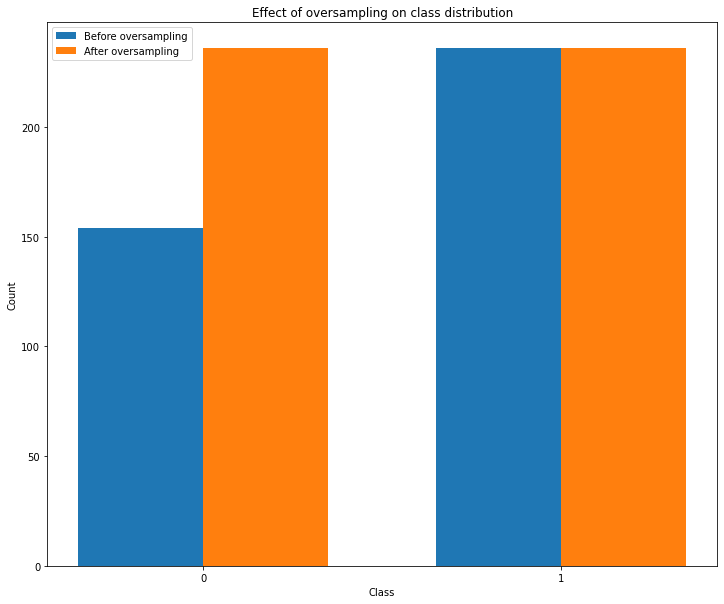

In [417]:
#BAR GRAPH

import numpy as np
import matplotlib.pyplot as plt

# Convert X_train, X_train_res, y_train, and y_train_res to integers
X_train = X_train.astype(int)
X_train_res = X_train_res.astype(int)
y_train = y_train.astype(int)
y_train_res = y_train_res.astype(int)

# Calculate class counts before and after oversampling
counts_before = [sum(y_train == 0), sum(y_train == 1)]
counts_after = [sum(y_train_res == 0), sum(y_train_res == 1)]

# Set up the bar chart
labels = ['0', '1']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 10))
ax.bar(x - width/2, counts_before, width, label='Before oversampling')
ax.bar(x + width/2, counts_after, width, label='After oversampling')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Effect of oversampling on class distribution')
ax.legend()

plt.show()





In [383]:
#FEATURE SELECTIION 

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.25, random_state=42)

# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM
svm = SVC(kernel='linear', C=1)
svm_rfe = RFE(svm)
svm_rfe.fit(X_train_scaled, y_train)
print("SVM: Number of best features:", svm_rfe.n_features_)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_rfe = RFE(dt)
dt_rfe.fit(X_train_scaled, y_train)
print("Decision Tree: Number of best features:", dt_rfe.n_features_)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_rfe = RFE(rf)
rf_rfe.fit(X_train_scaled, y_train)
print("Random Forest: Number of best features:", rf_rfe.n_features_)

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr_rfe = RFE(lr)
lr_rfe.fit(X_train_scaled, y_train)
print("Logistic Regression: Number of best features:", lr_rfe.n_features_)





SVM: Number of best features: 8
Decision Tree: Number of best features: 8
Random Forest: Number of best features: 8
Logistic Regression: Number of best features: 8


In [418]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE

# Set a random seed
np.random.seed(42)


# Train an SVM model and evaluate its performance
svm = SVC()
svm.fit(X_train_res, y_train_res)
svm_pred = svm.predict(X_test)
svm_acc_1 = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_acc_1)

svm_report = classification_report(y_test, svm_pred)
print("Classification report:\n", svm_report)

cv_scores_svm = cross_val_score(svm, X_train_res, y_train_res, cv=5)
print("Cross-validation scores:", cv_scores_svm)

# Perform RFE and train an SVM model with the selected features
svm_rfe = SVC(kernel='linear')
rfe = RFE(estimator=svm_rfe, n_features_to_select=8, step=1, importance_getter='coef_')
rfe.fit(X_train_res, y_train_res)

# Select the top 8 features based on RFE
selected_features = X_train_res.columns[rfe.support_]

# Split the data into training and testing sets (using the same split as before)
X_train_selected = X_train_res[selected_features]
X_test_selected = X_test[selected_features]

# Train an SVM model with the selected features and evaluate its performance
svm_selected = SVC(kernel='linear')
svm_selected.fit(X_train_selected, y_train_res)
svm_selected_pred = svm_selected.predict(X_test_selected)
svm_acc_2 = accuracy_score(y_test, svm_selected_pred)
print("SVM accuracy with 8 selected features:", svm_acc_2)

svm_selected_report = classification_report(y_test, svm_selected_pred)
print("Classification report with 8 selected features:\n", svm_selected_report)

cv_scores_svm_selected = cross_val_score(svm_selected, X_train_selected, y_train_res, cv=5)
print("Cross-validation scores with 8 selected features:", cv_scores_svm_selected)

precision, recall, f1, support = precision_recall_fscore_support(y_test, svm_selected_pred, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


SVM accuracy: 0.7
Classification report:
               precision    recall  f1-score   support

           0       0.57      0.65      0.61        46
           1       0.79      0.73      0.76        84

    accuracy                           0.70       130
   macro avg       0.68      0.69      0.68       130
weighted avg       0.71      0.70      0.70       130

Cross-validation scores: [0.57894737 0.54736842 0.67021277 0.58510638 0.60638298]
SVM accuracy with 8 selected features: 0.8769230769230769
Classification report with 8 selected features:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82        46
           1       0.90      0.92      0.91        84

    accuracy                           0.88       130
   macro avg       0.87      0.86      0.86       130
weighted avg       0.88      0.88      0.88       130

Cross-validation scores with 8 selected features: [0.92631579 0.87368421 0.92553191 0.92553191 0.94680851]
Precisio

In [445]:
# Set a random seed
np.random.seed(42)

# Train a Decision Tree model and evaluate its performance
dt = DecisionTreeClassifier()
dt.fit(X_train_res, y_train_res)
dt_pred = dt.predict(X_test)
dt_acc_1 = accuracy_score(y_test, dt_pred)
print("Decision Tree accuracy:", dt_acc_1)

dt_report = classification_report(y_test, dt_pred)
print("Classification report:\n", dt_report)

cv_scores_dt = cross_val_score(dt, X_train_res, y_train_res, cv=5)
print("Cross-validation scores:", cv_scores_dt)

# Perform RFE and train a Decision Tree model with the selected features
dt_rfe = DecisionTreeClassifier(max_depth=5, random_state=42)
rfe = RFE(estimator=dt_rfe, n_features_to_select=8, step=1)
rfe.fit(X_train_res, y_train_res)

# Select the top 8 features based on RFE
selected_features = X_train_res.columns[rfe.support_]

# Split the data into training and testing sets (using the same split as before)
X_train_selected = X_train_res[selected_features]
X_test_selected = X_test[selected_features]

# Train a Decision Tree model with the selected features and evaluate its performance
dt_selected = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_selected.fit(X_train_selected, y_train_res)
dt_selected_pred = dt_selected.predict(X_test_selected)
dt_acc_2 = accuracy_score(y_test, dt_selected_pred)
print("Decision Tree accuracy with 8 selected features:", dt_acc_2)

dt_selected_report = classification_report(y_test, dt_selected_pred)
print("Classification report with 8 selected features:\n", dt_selected_report)

cv_scores_dt_selected = cross_val_score(dt_selected, X_train_selected, y_train_res, cv=5)
print("Cross-validation scores with 8 selected features:", cv_scores_dt_selected)

precision, recall, f1, support = precision_recall_fscore_support(y_test, dt_selected_pred, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


Decision Tree accuracy: 0.9692307692307692
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.99      0.96      0.98        84

    accuracy                           0.97       130
   macro avg       0.96      0.97      0.97       130
weighted avg       0.97      0.97      0.97       130

Cross-validation scores: [0.95789474 0.94736842 0.91489362 0.9787234  1.        ]
Decision Tree accuracy with 8 selected features: 0.9384615384615385
Classification report with 8 selected features:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        46
           1       0.97      0.93      0.95        84

    accuracy                           0.94       130
   macro avg       0.93      0.94      0.93       130
weighted avg       0.94      0.94      0.94       130

Cross-validation scores with 8 selected features: [0.93684211 0.94736842 0.92553

In [446]:
# Set a random seed
np.random.seed(42)

# Train a Random Forest model and evaluate its performance
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
rf_pred = rf.predict(X_test)
rf_acc_1 = accuracy_score(y_test, rf_pred)
print("Random Forest accuracy:", rf_acc_1)

rf_report = classification_report(y_test, rf_pred)
print("Classification report:\n", rf_report)

cv_scores_rf = cross_val_score(rf, X_train_res, y_train_res, cv=5)
print("Cross-validation scores:", cv_scores_rf)

# Perform RFE and train a Random Forest model with the selected features
rf_rfe = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfe = RFE(estimator=rf_rfe, n_features_to_select=8, step=1)
rfe.fit(X_train_res, y_train_res)

# Select the top 8 features based on RFE
selected_features = X_train_res.columns[rfe.support_]

# Split the data into training and testing sets (using the same split as before)
X_train_selected = X_train_res[selected_features]
X_test_selected = X_test[selected_features]

# Train a Random Forest model with the selected features and evaluate its performance
rf_selected = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_selected.fit(X_train_selected, y_train_res)
rf_selected_pred = rf_selected.predict(X_test_selected)
rf_acc_2 = accuracy_score(y_test, rf_selected_pred)
print("Random Forest accuracy with 8 selected features:", rf_acc_2)

rf_selected_report = classification_report(y_test, rf_selected_pred)
print("Classification report with 8 selected features:\n", rf_selected_report)

cv_scores_rf_selected = cross_val_score(rf_selected, X_train_selected, y_train_res, cv=5)
print("Cross-validation scores with 8 selected features:", cv_scores_rf_selected)

precision, recall, f1, support = precision_recall_fscore_support(y_test, rf_selected_pred, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


Random Forest accuracy: 0.9923076923076923
Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.99      0.99        84

    accuracy                           0.99       130
   macro avg       0.99      0.99      0.99       130
weighted avg       0.99      0.99      0.99       130

Cross-validation scores: [0.97894737 0.95789474 0.93617021 0.9787234  1.        ]
Random Forest accuracy with 8 selected features: 0.9307692307692308
Classification report with 8 selected features:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        46
           1       0.95      0.94      0.95        84

    accuracy                           0.93       130
   macro avg       0.92      0.93      0.92       130
weighted avg       0.93      0.93      0.93       130

Cross-validation scores with 8 selected features: [0.94736842 0.92631579 0.88297

In [448]:
# Set a random seed
np.random.seed(42)

# Train a Logistic Regression model and evaluate its performance
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)
lr_pred = lr.predict(X_test)
lr_acc_1 = accuracy_score(y_test, lr_pred)
print("Logistic Regression accuracy:", lr_acc_1)

lr_report = classification_report(y_test, lr_pred)
print("Classification report:\n", lr_report)

cv_scores_lr = cross_val_score(lr, X_train_res, y_train_res, cv=5)
print("Cross-validation scores:", cv_scores_lr)

# Perform RFE and train a Logistic Regression model with the selected features
lr_rfe = LogisticRegression(random_state=42)
rfe = RFE(estimator=lr_rfe, n_features_to_select=8, step=1)
rfe.fit(X_train_res, y_train_res)

# Select the top 8 features based on RFE
selected_features = X_train_res.columns[rfe.support_]

# Split the data into training and testing sets (using the same split as before)
X_train_selected = X_train_res[selected_features]
X_test_selected = X_test[selected_features]

# Train a Logistic Regression model with the selected features and evaluate its performance
lr_selected = LogisticRegression(max_iter=1000, random_state=42)
lr_selected.fit(X_train_selected, y_train_res)
lr_selected_pred = lr_selected.predict(X_test_selected)
lr_acc_2 = accuracy_score(y_test, lr_selected_pred)
print("Logistic Regression accuracy with 8 selected features:", lr_acc_2)

lr_selected_report = classification_report(y_test, lr_selected_pred)
print("Classification report with 8 selected features:\n", lr_selected_report)

cv_scores_lr_selected = cross_val_score(lr_selected, X_train_selected, y_train_res, cv=5)
print("Cross-validation scores with 8 selected features:", cv_scores_lr_selected)

precision, recall, f1, support = precision_recall_fscore_support(y_test, lr_selected_pred, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Logistic Regression accuracy: 0.9307692307692308
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        46
           1       0.95      0.94      0.95        84

    accuracy                           0.93       130
   macro avg       0.92      0.93      0.92       130
weighted avg       0.93      0.93      0.93       130

Cross-validation scores: [0.93684211 0.87368421 0.90425532 0.92553191 0.9787234 ]
Logistic Regression accuracy with 8 selected features: 0.9076923076923077
Classification report with 8 selected features:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87        46
           1       0.95      0.90      0.93        84

    accuracy                           0.91       130
   macro avg       0.90      0.91      0.90       130
weighted avg       0.91      0.91      0.91       130

Cross-validation scores with 8 selected features: [0.93684211 0.8631

/Users/shericadsouza/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shericadsouza/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [423]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize classifiers
svm = SVC()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()

# Train and test classifiers on different subsets of data - All Features
# SVM
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy with All Features:", svm_acc)

# Random Forest
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest accuracy with All Features:", rf_acc)

# Decision Tree
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree accuracy with All Features:", dt_acc)

# Logistic Regression
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression accuracy with All Features:", lr_acc)



SVM accuracy with All Features: 0.6461538461538462
Random Forest accuracy with All Features: 0.9923076923076923
Decision Tree accuracy with All Features: 0.9615384615384616
Logistic Regression accuracy with All Features: 0.9307692307692308


/Users/shericadsouza/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [389]:
# Set a random seed
np.random.seed(42)

# Train a Logistic Regression model and evaluate its performance
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)
lr_pred = lr.predict(X_test)
lr_acc_1 = accuracy_score(y_test, lr_pred)
print("Logistic Regression accuracy:", lr_acc_1)

lr_report = classification_report(y_test, lr_pred)
print("Classification report:\n", lr_report)

cv_scores_lr = cross_val_score(lr, X_train_res, y_train_res, cv=5)
print("Cross-validation scores:", cv_scores_lr)

# Perform RFE and train a Logistic Regression model with the selected features
lr_rfe = LogisticRegression(random_state=42)
rfe = RFE(estimator=lr_rfe, n_features_to_select=8, step=1)
rfe.fit(X_train_res, y_train_res)

# Select the top 8 features based on RFE
selected_features = X_train_res.columns[rfe.support_]

# Split the data into training and testing sets (using the same split as before)
X_train_selected = X_train_res[selected_features]
X_test_selected = X_test[selected_features]

# Train a Logistic Regression model with the selected features and evaluate its performance
lr_selected = LogisticRegression(random_state=42)
lr_selected.fit(X_train_selected, y_train_res)
lr_selected_pred = lr_selected.predict(X_test_selected)
lr_acc_2 = accuracy_score(y_test, lr_selected_pred)
print("Logistic Regression accuracy with 8 selected features:", lr_acc_2)

lr_selected_report = classification_report(y_test, lr_selected_pred)
print("Classification report with 8 selected features:\n", lr_selected_report)

cv_scores_lr_selected = cross_val_score(lr_selected, X_train_selected, y_train_res, cv=5)
print("Cross-validation scores with 8 selected features:", cv_scores_lr_selected)


Logistic Regression accuracy: 0.9461538461538461
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.96      0.95      0.96        84

    accuracy                           0.95       130
   macro avg       0.94      0.94      0.94       130
weighted avg       0.95      0.95      0.95       130

Cross-validation scores: [0.86170213 0.93617021 0.91489362 0.96808511 0.94680851]
Logistic Regression accuracy with 8 selected features: 0.9230769230769231
Classification report with 8 selected features:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89        46
           1       0.95      0.93      0.94        84

    accuracy                           0.92       130
   macro avg       0.91      0.92      0.92       130
weighted avg       0.92      0.92      0.92       130

Cross-validation scores with 8 selected features: [0.85106383 0.9042

/Users/shericadsouza/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shericadsouza/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [460]:
#SVM
np.random.seed(42)
# your code for data preprocessing and splitting goes here

svm = SVC()
svm.fit(X_train_res, y_train_res)
svm_pred = svm.predict(X_test)
svm_acc_1 = accuracy_score(y_test, svm_pred)
print("SVM accuracy after Oversampling:", svm_acc_1)

# Calculate precision, recall, and F1-score
svm_report = classification_report(y_test, svm_pred)
print("Classification report:\n", svm_report)

# Performing cross-validation to evaluate model performance
cv_scores_svm = cross_val_score(svm, X_train_res, y_train_res, cv=5)
print("Cross-validation scores:", cv_scores_svm)







SVM accuracy after Oversampling: 0.7
Classification report:
               precision    recall  f1-score   support

           0       0.57      0.65      0.61        46
           1       0.79      0.73      0.76        84

    accuracy                           0.70       130
   macro avg       0.68      0.69      0.68       130
weighted avg       0.71      0.70      0.70       130

Cross-validation scores: [0.57894737 0.54736842 0.67021277 0.58510638 0.60638298]


In [425]:
#Random Forest
np.random.seed(42)

rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
rf_pred = rf.predict(X_test)
rf_acc_1 = accuracy_score(y_test, rf_pred)
print("Accuracy after using Oversampling:", rf_acc_1)

# Calculate precision, recall, and F1-score
rf_report = classification_report(y_test, rf_pred)
print("Classification report:\n", rf_report)

# Performing cross-validation to evaluate model performance
cv_scores_rf = cross_val_score(rf, X_train_res, y_train_res, cv=5)
print("Cross-validation scores:", cv_scores_rf)



Accuracy after using Oversampling: 0.9923076923076923
Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.99      0.99        84

    accuracy                           0.99       130
   macro avg       0.99      0.99      0.99       130
weighted avg       0.99      0.99      0.99       130

Cross-validation scores: [0.97894737 0.95789474 0.93617021 0.9787234  1.        ]


In [426]:
#Decision Trees

np.random.seed(42)

# dtc = DecisionTreeClassifier(random_state=42)
# dtc.fit(X_train_res, y_train_res)
# dtc_pred = dtc.predict(X_test)

# #evaluating
# accuracy_7 = accuracy_score(y_test, dtc_pred)
# print("Accuracy:", accuracy_7)
# print(classification_report(y_test, dtc_pred)) 

dt = DecisionTreeClassifier()
dt.fit(X_train_res, y_train_res)
dt_pred = dt.predict(X_test)
dt_acc_1 = accuracy_score(y_test, dt_pred)
print("Decision Tree accuracy after using Oversampling:", dt_acc_1)

# Calculate precision, recall, and F1-score
dt_report = classification_report(y_test, dt_pred)
print("Classification report:\n", dt_report)

# Performing cross-validation to evaluate model performance
cv_scores_dt = cross_val_score(dt, X_train_res, y_train_res, cv=5)
print("Cross-validation scores:", cv_scores_dt)

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_test, dt_pred, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Decision Tree accuracy after using Oversampling: 0.9692307692307692
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.99      0.96      0.98        84

    accuracy                           0.97       130
   macro avg       0.96      0.97      0.97       130
weighted avg       0.97      0.97      0.97       130

Cross-validation scores: [0.95789474 0.94736842 0.91489362 0.9787234  1.        ]
Precision: 0.97
Recall: 0.97
F1-score: 0.97


In [427]:
#Logistic Regression
# # Instantiate the logistic regression model
# logreg = LogisticRegression(random_state=42)

# # Train the model using the resampled training sets
# logreg.fit(X_train_res, y_train_res.ravel())

# # Predict using the test set
# logreg_pred = logreg.predict(X_test)

# # Evaluate the accuracy
# accuracy_8 = accuracy_score(y_test, logreg_pred)
# print("Accuracy:", accuracy_8)
# print(classification_report(y_test, logreg_pred))
np.random.seed(42)

lr = LogisticRegression()

lr.fit(X_train_res, y_train_res)
lr_pred = lr.predict(X_test)
lr_acc_1 = accuracy_score(y_test, lr_pred)
print("Logistic Regression accuracy after Oversampling:", lr_acc_1)

# Calculate precision, recall, and F1-score
lr_report = classification_report(y_test, lr_pred)
print("Classification report:\n", lr_report)

# Performing cross-validation to evaluate model performance
cv_scores_lr = cross_val_score(lr, X_train_res, y_train_res, cv=5)
print("Cross-validation scores:", cv_scores_lr)

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_test, lr_pred, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


Logistic Regression accuracy after Oversampling: 0.9307692307692308
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        46
           1       0.95      0.94      0.95        84

    accuracy                           0.93       130
   macro avg       0.92      0.93      0.92       130
weighted avg       0.93      0.93      0.93       130

Cross-validation scores: [0.93684211 0.87368421 0.90425532 0.92553191 0.9787234 ]
Precision: 0.93
Recall: 0.93
F1-score: 0.93


/Users/shericadsouza/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shericadsouza/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [395]:
#ACCURACIES ON UNBALACED DATASET

In [396]:
# #SVM MODEL

# svm_model = SVC(kernel ='linear', C = 1, random_state=42)

# #train the model using the training sets
# svm_model.fit(X_train, y_train)

# #predict using the test set
# svm_pred = svm_model.predict(X_test)

# #evaluating
# accuracy_1 = metrics.accuracy_score(y_test, svm_pred)
# print("Accuracy:",metrics.accuracy_score(y_test, svm_pred))
# print(classification_report(y_test, svm_pred)) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy with All Features:", svm_acc)

# Calculate precision, recall, and F1-score
svm_report = classification_report(y_test, svm_pred)
print("Classification report:\n", svm_report)



SVM accuracy with All Features: 0.6461538461538462
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.65      1.00      0.79        84

    accuracy                           0.65       130
   macro avg       0.32      0.50      0.39       130
weighted avg       0.42      0.65      0.51       130



/Users/shericadsouza/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shericadsouza/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shericadsouza/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [432]:
#RandomForest

# rfc = RandomForestClassifier(random_state=42)

# #train the model using the training sets
# rfc.fit(X_train, y_train)

# #predict using the test set
# rfc_pred = rfc.predict(X_test)

# #evaluating
# accuracy_2 = accuracy_score(y_test, rfc_pred)
# print("Accuracy:", accuracy_2)
# print(classification_report(y_test, rfc_pred)) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest accuracy with All Features:", rf_acc)

# Calculate precision, recall, and F1-score
rf_report = classification_report(y_test, rf_pred)
print("Classification report:\n", rf_report)



Random Forest accuracy with All Features: 0.9923076923076923
Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.99      0.99        84

    accuracy                           0.99       130
   macro avg       0.99      0.99      0.99       130
weighted avg       0.99      0.99      0.99       130



In [433]:
#Decision Trees

# dtc = DecisionTreeClassifier(random_state=42)
# dtc.fit(X_train, y_train)
# dtc_pred = dtc.predict(X_test)

# #evaluating
# accuracy_3 = accuracy_score(y_test, dtc_pred)
# print("Accuracy:", accuracy_3)
# print(classification_report(y_test, dtc_pred)) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree accuracy with All Features:", dt_acc)

# Calculate precision, recall, and F1-score
dt_report = classification_report(y_test, dt_pred)
print("Classification report:\n", dt_report)



Decision Tree accuracy with All Features: 0.9692307692307692
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.99      0.96      0.98        84

    accuracy                           0.97       130
   macro avg       0.96      0.97      0.97       130
weighted avg       0.97      0.97      0.97       130



In [431]:
#Logistic Regression

# logreg = LogisticRegression(random_state=42)

# #train the model using the training sets
# logreg.fit(X_train, y_train)

# #predict using the test set
# logreg_pred = logreg.predict(X_test)

# #evaluating
# accuracy_4 = accuracy_score(y_test, logreg_pred)
# print("Accuracy:", accuracy_4)
# print(classification_report(y_test, logreg_pred)) 

lr = LogisticRegression()

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression accuracy with All Features:", lr_acc)

# Calculate precision, recall, and F1-score
lr_report = classification_report(y_test, lr_pred)
print("Classification report:\n", lr_report)



Logistic Regression accuracy with All Features: 0.9307692307692308
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        46
           1       0.94      0.95      0.95        84

    accuracy                           0.93       130
   macro avg       0.93      0.92      0.92       130
weighted avg       0.93      0.93      0.93       130



/Users/shericadsouza/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/shericadsouza/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shericadsouza/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

<module 'matplotlib.pyplot' from '/Users/shericadsouza/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

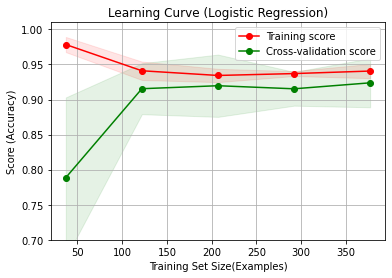

In [434]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Set Size(Examples)")
    plt.ylabel("Score (Accuracy)")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Plot the learning curve
plot_learning_curve(lr, "Learning Curve (Logistic Regression)", X_train_res, y_train_res, ylim=(0.7, 1.01), cv=5, n_jobs=-1)



<module 'matplotlib.pyplot' from '/Users/shericadsouza/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

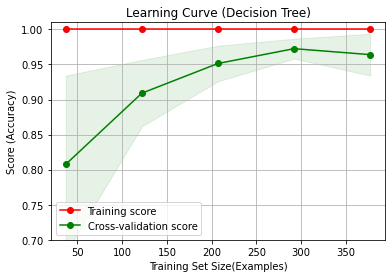

In [439]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Set Size(Examples)")
    plt.ylabel("Score (Accuracy)")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Plot the learning curve
plot_learning_curve(dt, "Learning Curve (Decision Tree)", X_train_res, y_train_res, ylim=(0.7, 1.01), cv=5, n_jobs=-1)



<module 'matplotlib.pyplot' from '/Users/shericadsouza/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

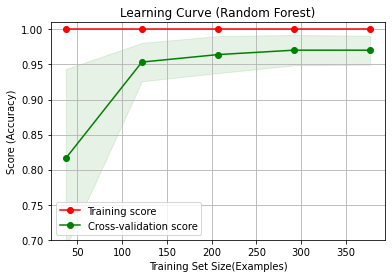

In [440]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Set Size(Examples)")
    plt.ylabel("Score (Accuracy)")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Plot the learning curve
plot_learning_curve(rf , "Learning Curve (Random Forest)", X_train_res, y_train_res, ylim=(0.7, 1.01), cv=5, n_jobs=-1)



<module 'matplotlib.pyplot' from '/Users/shericadsouza/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

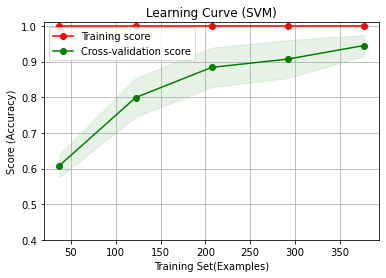

In [444]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Set(Examples)")
    plt.ylabel("Score (Accuracy)")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Plot the learning curve
plot_learning_curve(svm, "Learning Curve (SVM)", X_train_res, y_train_res, ylim=(0.4, 1.01), cv=5, n_jobs=-1)



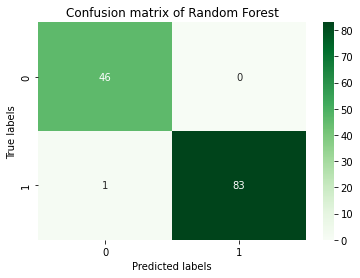

In [468]:
#CONFUSION MATRIX FOR PREDICTION MODEL


y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Greens')
plt.title('Confusion matrix of Random Forest')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


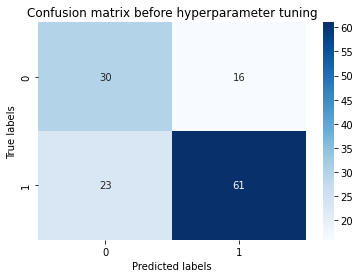

In [461]:
# CONFUSION MATRIX FOR SVM MODEL

# Before hyperparameter tuning
svm_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion matrix before hyperparameter tuning')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show(

In [406]:
#HYPERPARAMETER TUNING 

In [407]:
# List of C values
C = np.logspace(-3, 2, 6 )
print(f'The list of values for C are {C}')

# List of gamma values
gamma = np.logspace(-3, 2, 6 )
print(f'The list of values for gamma are {gamma}')

The list of values for C are [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
The list of values for gamma are [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [443]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Define the SVM model
svm = SVC()

# Grid of parameters used for tuning the model
param_grid = {'C': np.logspace(-3, 2, 6), 
              'kernel': ['linear', 'rbf', 'poly'], 
              'degree': [2, 3, 4], 
              'gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 6))}

# Create a RandomizedSearchCV object
svm_random = RandomizedSearchCV(estimator=svm, param_distributions=param_grid, scoring='accuracy', cv=5, n_iter=10, random_state=42)

# Fit the RandomizedSearchCV object to the training data
svm_random.fit(X_train_res, y_train_res)

# Get the best hyperparameters and model
best_params = svm_random.best_params_
best_model = svm_random.best_estimator_

# Train the best model on the training data
best_model.fit(X_train_res, y_train_res)

# Make predictions on the test data using the best model
svm_pred = best_model.predict(X_test)

# Calculate accuracy score
svm_acc_2 = accuracy_score(y_test, svm_pred)

print("Accuracy before hyperparameter tuning:",svm_acc_1)
print("Accuracy after hyperparameter tuning:", svm_acc_2)


svm = SVC(C=best_params['C'], kernel=best_params['kernel'], degree=best_params['degree'], gamma=best_params['gamma'])

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(svm, X_train_res, y_train_res, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))



#To check the accuracy on the testdata 
# Train the model on the training set
svm.fit(X_train, y_train)

# Make predictions on the testing set
svm_pred = svm.predict(X_test)

# Calculate accuracy score
svm_acc = accuracy_score(y_test, svm_pred)

# Print the accuracy score
print("Accuracy score on the holdout test set:", svm_acc)




Accuracy before hyperparameter tuning: 0.7
Accuracy after hyperparameter tuning: 0.9461538461538461
Cross-validation scores: [0.96842105 0.91578947 0.90425532 0.95744681 0.9787234 ]
Mean cross-validation score: 0.9449272116461367
Accuracy score on the holdout test set: 0.9461538461538461


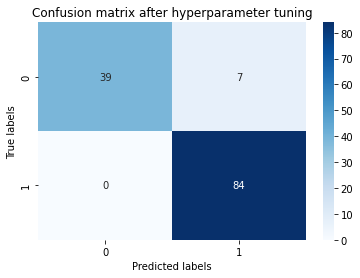

In [465]:
# After hyperparameter tuning
svm_pred_2 = best_model.predict(X_test)
cm_2 = confusion_matrix(y_test, svm_pred_2)
sns.heatmap(cm_2, annot=True, cmap='Blues')
plt.title('Confusion matrix after hyperparameter tuning')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [409]:
#RECOMMENDER SYSTEM PART

In [410]:
#data.head()

In [411]:
#filter only positive class rows(it will remove the negative class rows)
#positive_dataset = data[data['class'] == 'Positive']
#positive_dataset.head()

In [412]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Activities
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,Moderate intensity aerobic exercises
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,NaN
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,Yoga or Pilates for flexibilty
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,NaN
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,Light aerobic exercises such as brisk walking


In [413]:
# Remove  null values
data = data.dropna()
print("Dataset without null values:\n", data.head())


Dataset without null values:
    Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   
8   67   Male      Yes        Yes                 No      Yes        Yes   
9   70   Male       No        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
2             No              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   
8            Yes              No     Yes          Yes              No   
9             No             Yes     Yes          Yes              No   

  partial paresis muscle stiffness Alopecia Obesity     class  \
0        

In [414]:
# Function to join the activities for each row
def combine_activities(row):
    return ' '.join([str(row['Activities'])])

data['Activities'] = data.apply(combine_activities, axis=1)

vectorizer = CountVectorizer()
activities_matrix = vectorizer.fit_transform(data['Activities'])

# Calculates the cosine similarity between activity vectors
cosine_similarities = cosine_similarity(activities_matrix)


def get_recommendations(age_min, age_max, top_n=5):

    age_filtered_data = data[(data['Age'] >= age_min) & (data['Age'] <= age_max)]
    
    # Apply the function to create a new column with combined activities for the filtered data
    age_filtered_data['Activities'] = age_filtered_data.apply(combine_activities, axis=1)
    
    # Creates a CountVectorizer object to convert the combined activities into a sparse matrix
    vectorizer = CountVectorizer()
    activities_matrix = vectorizer.fit_transform(age_filtered_data['Activities'])
    
    # Calculates the cosine similarity between activity vectors
    cosine_similarities = cosine_similarity(activities_matrix)
    
    sim_scores = np.any(cosine_similarities, axis=0)
    
    # Sort the similarity scores in descending order
    sim_scores = sorted(enumerate(sim_scores), key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top N similar rows
    top_indices = [i[0] for i in sim_scores[:top_n]]
    
    # Return the top N similar rows' Activities
    return age_filtered_data.iloc[top_indices]['Activities']


age_min = 30  # Mention the minimum age 
age_max = 35  # Mention the maximum age 
top_n = 3  # Mention the number of recommendations n
recommendations = get_recommendations(age_min, age_max, top_n)
print(recommendations)


12                   Ensure adequate sleep
25    Moderate intensity aerobic exercises
38          Yoga or Pilates for flexibilty
Name: Activities, dtype: object


/var/folders/00/rygk0mbs15n6wvg98m7jzptm0000gn/T/ipykernel_35854/2582228016.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_filtered_data['Activities'] = age_filtered_data.apply(combine_activities, axis=1)


In [415]:
# Function to concatenate activities for each row
def combine_activities(row):
    return ' '.join([str(row['Activities'])])

# Apply the function to create a new column with combined activities
data['Activities'] = data.apply(combine_activities, axis=1)

# Create a CountVectorizer object to convert the combined activities into a sparse matrix
vectorizer = CountVectorizer()
activities_matrix = vectorizer.fit_transform(data['Activities'])

# Compute the cosine similarity between activity vectors
cosine_similarities = cosine_similarity(activities_matrix)


def get_recommendations(age_min, age_max, top_n=5):
    # Filter the data for the given age range
    age_filtered_data = data[(data['Age'] >= age_min) & (data['Age'] <= age_max)]
    
    # Apply the function to create a new column with combined activities for the filtered data
    age_filtered_data['Activities'] = age_filtered_data.apply(combine_activities, axis=1)
    
    # Create a CountVectorizer object to convert the combined activities into a sparse matrix
    vectorizer = CountVectorizer()
    activities_matrix = vectorizer.fit_transform(age_filtered_data['Activities'])
    
    # Compute the cosine similarity between activity vectors
    cosine_similarities = cosine_similarity(activities_matrix)
    
    # Reduce the 2-dimensional array to a single value using np.any() or np.all()
    sim_scores = np.any(cosine_similarities, axis=0)
    
    # Sort the similarity scores in descending order
    sim_scores = sorted(enumerate(sim_scores), key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top N similar rows
    top_indices = [i[0] for i in sim_scores[:top_n]]
    
    # Return the top N similar rows' Activities
    return age_filtered_data.iloc[top_indices]['Activities']


age_min = 60  # Specify the minimum age of the range
age_max = 65  # Specify the maximum age of the range
top_n = 3  # Specify the number of recommendations needed
recommendations = get_recommendations(age_min, age_max, top_n)
print(recommendations)



4     Light aerobic exercises such as brisk walking 
13                                        Meditation
14                                              Yoga
Name: Activities, dtype: object


/var/folders/00/rygk0mbs15n6wvg98m7jzptm0000gn/T/ipykernel_35854/1210103422.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_filtered_data['Activities'] = age_filtered_data.apply(combine_activities, axis=1)
